## Logistic regression example


In [1]:
# 라이브러리 호출
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('./mba_admission.csv')

In [3]:
data.columns

Index(['gmat', 'gpa', 'work_experience', 'admitted'], dtype='object')

In [4]:
data.head()

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,1
3,710,3.7,5,1
4,680,3.9,4,1


In [5]:
# Train - validation - test 용도는 만들지 않을께요!
class dataset(torch.utils.data.Dataset):
  def __init__(self,data):
    self.data = data
    self.data['gmat'] /= self.data['gmat'].max()
    self.data['gpa'] /= self.data['gpa'].max()
    self.data['work_experience'] /= self.data['work_experience'].max()

  def __getitem__(self,idx):
    X = torch.Tensor(self.data[self.data.columns[:3]].values)
    Y = torch.Tensor(self.data['admitted'])
    return X[idx,:], Y[idx]

  def __len__(self):
    return self.data.shape[0]

In [6]:
train_dataset = dataset(data)
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=8,shuffle=True,drop_last=False)

In [7]:
# neural network 모델 생성
# 구조:  입력(3), 은닉(10), 출력(1)
# 활성화:         tanh      sigmoid
class admission_model(nn.Module):
  def __init__(self):
    super(admission_model,self).__init__()
    self.lin1 = nn.Linear(3,10)
    self.lin2 = nn.Linear(10,1)

  def forward(self,x):
    x = self.lin1(x)
    x = F.tanh(x)
    x = self.lin2(x)
    x = F.sigmoid(x)
    return x

In [8]:
model = admission_model()
optimizer = optim.SGD(model.parameters(),lr=0.5)

In [9]:
for ep in range(100):
  loss_buffer = []
  for X,Y in train_loader:
    optimizer.zero_grad()
    y_infer = model(X).view(-1)
    loss = -torch.mean(Y*torch.log(y_infer)+(1-Y)*torch.log(1-y_infer)) # cross entropy 함수 --> MNIST예제에서 상세히
    loss.backward()
    optimizer.step()
    loss_buffer.append(loss.item())

  if ep % 10 == 0:
    print('Epoch: {}, Loss: {}'.format(ep,np.mean(loss_buffer)))

/Users/kenny/.conda/envs/helloworld/lib/python3.7/site-packages/torch/nn/functional.py:1956: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/Users/kenny/.conda/envs/helloworld/lib/python3.7/site-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 0, Loss: 0.7096370577812194
Epoch: 10, Loss: 0.41837204098701475
Epoch: 20, Loss: 0.2528043031692505
Epoch: 30, Loss: 0.2547803074121475
Epoch: 40, Loss: 0.18882098346948623
Epoch: 50, Loss: 0.0881456457078457
Epoch: 60, Loss: 0.07699517235159874
Epoch: 70, Loss: 0.0843094427138567
Epoch: 80, Loss: 0.0940885073505342
Epoch: 90, Loss: 0.04502794481813908


Text(0.5, 1.0, 'MBA admission result included prediction')

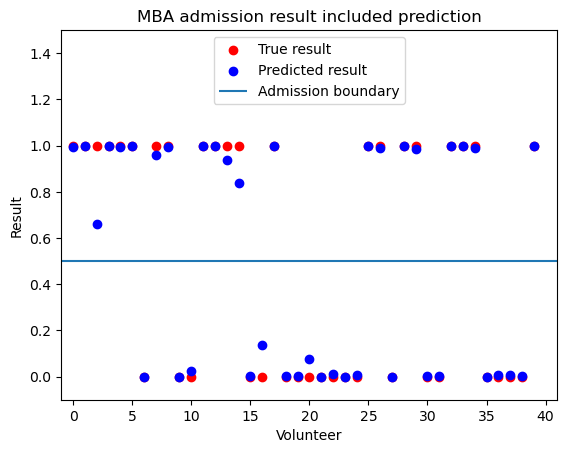

In [10]:
# 결과 시각화
y_infer = model(torch.Tensor(data[data.columns[:3]].values))

plt.scatter(np.arange(data.shape[0]),data['admitted'],color='red',label='True result')
plt.scatter(np.arange(data.shape[0]),y_infer.detach().numpy(),color='blue',label='Predicted result')
plt.hlines(0.5,-10,60,label='Admission boundary')
plt.legend(loc='upper center',fontsize=' 10')
plt.xlim(-1,41)
plt.ylim(-0.1,1.5)
plt.xlabel('Volunteer')
plt.ylabel('Result')
plt.title('MBA admission result included prediction')